In [1]:
import numpy as np
import pandas as pd

## Feature scaling

In Machine Learning, oftentimes it's very important to *scale* our feature data before training on it. 

To understand why, assume we have a dataset with the following features

**age** (18-100 years), 

**salary** (25.000-75.000 euros) 

**height** (1-2 meters)

In [2]:
import random

# Generate 10 rows of random data using list comprehension
random_data = [{'age': random.randint(18, 100),
                'salary': random.randint(25000, 75000),
                'height': round(random.uniform(1, 2), 2), 
                'y': random.uniform(0,100)} 
                for _ in range(10)]

df = pd.DataFrame(random_data)

df

,age,salary,height,y
0,82,30350,1.12,67.531620
1,69,35078,1.42,1.147254
2,32,73081,1.35,64.256541
3,66,28711,1.87,84.831470
4,36,54846,1.62,89.594147
5,52,35679,1.52,31.160705
6,70,28245,1.18,28.349438
7,94,70127,1.09,72.564308
8,91,26163,1.77,52.281722
9,69,52619,1.71,8.902926


If we try to use these features into (e.g.,) a linear model that predicts a target *y*, we will have the following

$$ y = w_3 \cdot \text(age) + w_2 \cdot \text(salary) + w_1 \cdot \text(height) + w_0 $$

We can notice a *risk* here: 

The contribution to *y* from of the feature Salary might dominate the contribution from the other features, since it's can take on so much larger values than the rest. 

Even Age runs at risk at dominating height.

Many models (not all!) are very sensitive to the scale difference between features. Indeed, the most advanced models (such as Neural Networks) are very sensitive.

---

## The solution

To bypass the above problem, we can *re-scale* our features so that they end up in the aprox. same range.

**The good news**

This does not affect the inherent relationship between relationship between our features and targets (what we're ultimately trying to modl)at all! 

Let's test this.

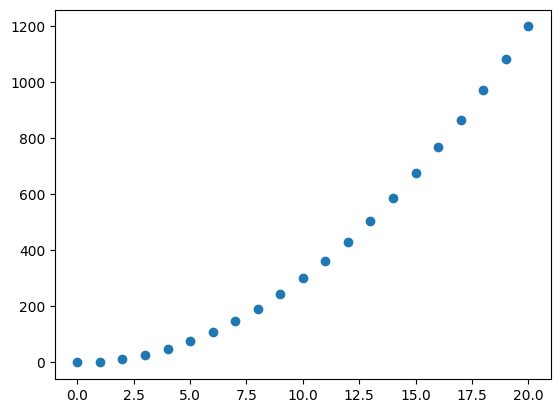

In [3]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([x for x in range(21)])
y = np.array([3*x**2 for x in X])

plt.scatter(X,y)
plt.show()

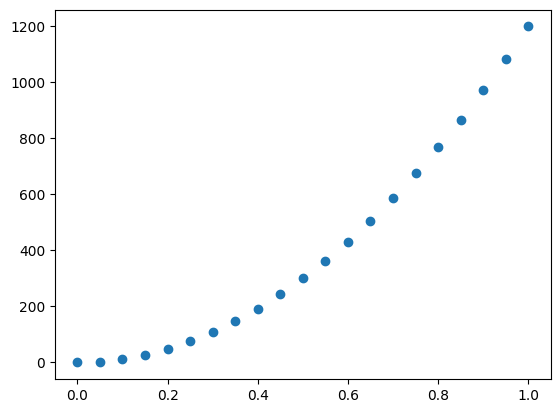

In [4]:
# now we scale x, by dividing by it's highest value

X_scaled = X/max(X)

plt.scatter(X_scaled, y)
plt.show()

Notice that the relationship between our feature and target has not changed at all! Only the scale of the x-values has changed.

**Conclusion:**

Feature scaling is required for many machine learning models, but not all model. However, performing feture scaling doesn't hurt performance for the models that don't require it!

Therefore, performing feature scaling is *almost* always a good idea!

---

**Types of Feature Scaling**

The goal of feature scaling is to bring the values of the features close to the range [-1,1]. It's not super important exactly what range you scale to, we just want to get rid of the massive scale differences that we sometime have.

There are several different types of feature scaling methods, one of which we used above.

What we did there, since the feature x was strictly positive, is we simply divided it by it's highest value. Simple, and elegant. This scales the feature x down to the range [0,1]. So a strictly positive feature got scaled down to something else strictly positive. Nice.

There are however also different methods. One of which is *Standardization*. This is done by performing this transformation on each value in the feature x.

$$ x^{scaled} = \frac{x^{unscaled} - \bar{x}}{\sigma_x}$$

where $ \bar{x}$ is the mean value of the feature x, and $\sigma_x$ is the standard deviation of feature feature x.

**På svenska:** Det här kommer transformera alla x-values i vår feature kolumn till 'antal standardavvikelser' from medelvärdet. Kommer ni ihåg från statistiken?

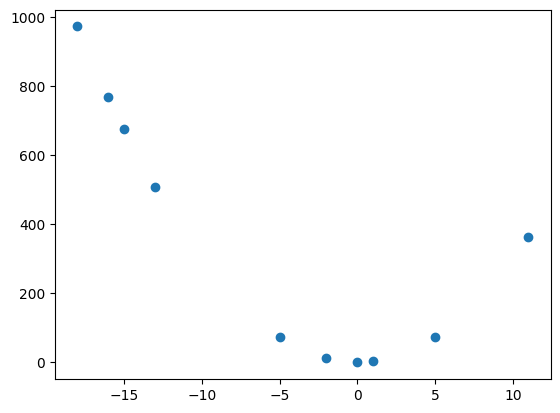

In [5]:
# Let's us test standardizing a feature column

X = np.array([random.randint(-20,20) for x in range(10)])
y = np.array([3*x**2 for x in X])

plt.scatter(X,y)
plt.show()

In [6]:
from sklearn.preprocessing import StandardScaler

# reshape feature to 2D, since it's required here

X = X.reshape(-1,1)

scaler = StandardScaler()
scaler.fit(X)                       # this line calculates the mean and the standard deviation of the feature

print('Mean of x:', scaler.mean_)
print('Std of x:', scaler.scale_)

Mean of x: [-5.2]
Std of x: [9.37869927]


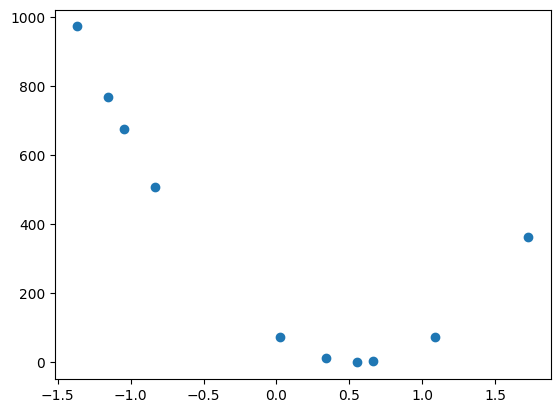

In [7]:
# transform our feature

X_standardized = scaler.transform(X)

plt.scatter(X_standardized,y)
plt.show()


Great, that was easy and we, again, see that the relationship between feature and target has not changed.

I usually use standardscaler for features that can take both negative and positive values, while using the method of dividing by the max value for features with strictly positive values.

Again, it's not superimportant. Bringing different features to aprox the same range is what's most important.

**BTW**

Even for features that can assume negative values - you can actually simply just divide by the absolute highest value there too. For this course, this is enough. You don't really have to work with the Standardscaler above, if you don't want to.

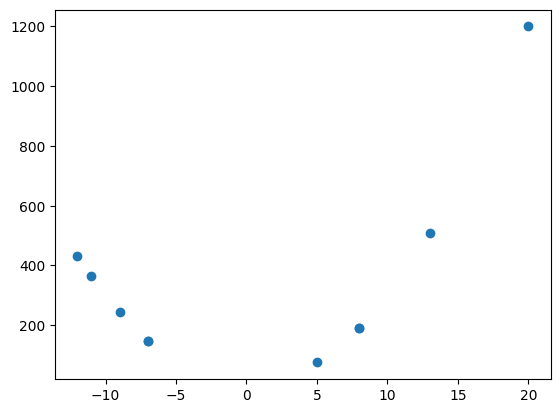

In [8]:
# Let's us test standardizing a feature column

X = np.array([random.randint(-20,20) for x in range(10)])
y = np.array([3*x**2 for x in X])

plt.scatter(X,y)
plt.show()

20
-12
20


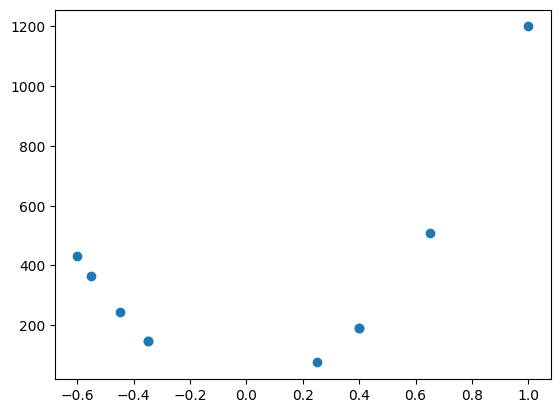

In [9]:
print(max(X))

print(min(X))

absolute_highest_value = max(np.abs(min(X)), np.abs(max(X)))

print(absolute_highest_value)

X_scaled = X/absolute_highest_value

plt.scatter(X_scaled,y)
plt.show()

---

## Important Caveats




    1. 

Only scale the features, not the targets! 

    2. 
    
**Very important**

Only ever use statistics from the Train set to perform scaling! Never ever use statistics from the test set. The reason is that this causes what call *data leakage* in which information from the test set (which is supposed to be completely unseen) leaks into the training data. This can give us very optimistic (but severly misleading) results when we try to interpret the performance on the test set.

Here's how to do it correctly:

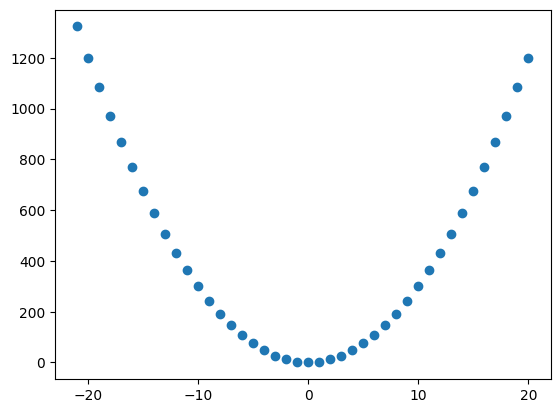

In [10]:
# create data, again

X = np.array([x for x in range(-21, 21)])
y = np.array([3*x**2 for x in X])

plt.scatter(X,y)
plt.show()

In [11]:
from sklearn.model_selection import train_test_split

test_size = 0.2

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=test_size, 
                                                    random_state=42)


X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(33, 1)
(33, 1)
(9, 1)
(9, 1)


Now we start the process of scaling our feature. 

**Note that we only calculate the mean and std on the train set**, but that we then apply it to both the train and test sets.
 

In [12]:
scaler = StandardScaler()
scaler.fit(X_train)             # calculate mean and std of the train set

X_train_scaled = scaler.transform(X_train)        # transform the train set using the statistic above
X_test_scaled = scaler.transform(X_test)          # transform the test set using the same statistics above

**Alternative 2**

Dividing by absolutely max value, instead of using Standarscaler

In [13]:
absolute_highest_value = max(np.abs(min(X_train)), np.abs(max(X_train)))

print(absolute_highest_value)

X_train_scaled = X_train/absolute_highest_value
X_test_scaled = X_test/absolute_highest_value

[21]


Great - we are now ready to train our model using this scaled feature!

It's as simple as

model.fit(X_train_scaled, y_train)

and the

model.predict(X_train_scaled)

model.predict(X_test_scaled)

---

We have actually seen scaled features before, most recently in the bike demand data set

In [14]:
import pandas as pd

df = pd.read_csv('../data/bike_rental/hour.csv')

FileNotFoundError: [Errno 2] No such file or directory: '../data/bike_rental/hour.csv'

Have a look at e.g., the features temp and atemp. They are scaled. 

It even says so if you take a look at the [documentation.](https://archive.ics.uci.edu/dataset/275/bike+sharing+dataset)

In [ ]:
df

**Fantastic, now you know how to perform feature scaling! It's a good habit to do it.**